In [23]:
import os, cv2

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from utils import plotting, get_segments

In [4]:
%load_ext autoreload
%autoreload 2

In [2]:
dataset_dir = "./CrowdCount/frames/frames/"

In [3]:
files = os.listdir(dataset_dir)

# Workflow Start

In [15]:
image = cv2.imread(os.path.join(dataset_dir, files[0]))

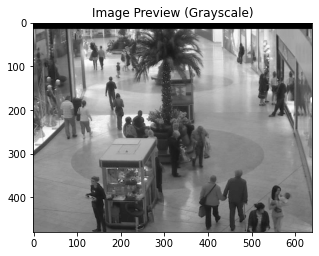

In [16]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plotting(gray, "Image Preview (Grayscale)")

In [17]:
# Read image
im_norm = np.float32(gray) / 255.0

# cropped_image = crop(im_norm, 300, 460, 0, 80)
# resized_img = resize(cropped_image, 64, 128)

# Calculate gradient
gx = cv2.Sobel(im_norm, cv2.CV_32F, 1, 0, ksize=1)
gy = cv2.Sobel(im_norm, cv2.CV_32F, 0, 1, ksize=1)

In [18]:
# Python Calculate gradient magnitude and direction ( in degrees )
mag, angle = cv2.cartToPolar(gx, gy, angleInDegrees=True)

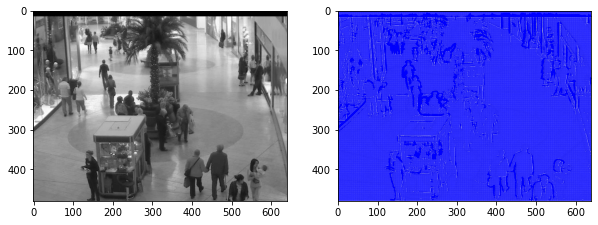

In [19]:
plt.figure(figsize=(10,5))

# display the image
plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray')

# display the magnitude of the gradients:
plt.subplot(1,2,2)
plt.imshow(mag, cmap='binary')
# and superimpose an arrow showing the gradient
# magnitude and direction: 
q = plt.quiver(gx, gy, color='blue')
# plt.savefig('gradient.png')
plt.show()

This above method shows that HOG cannot be applied on the image completely.

In [20]:
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

In [21]:
(rects, weights) = hog.detectMultiScale(gray, winStride=(8,8))
rects = np.array([[x, y, x + w, y + h] for (x, y, w, h) in rects])
for (xA, yA, xB, yB) in rects:
    cv2.rectangle(gray, (xA, yA), (xB, yB), (0, 255, 0), 2)

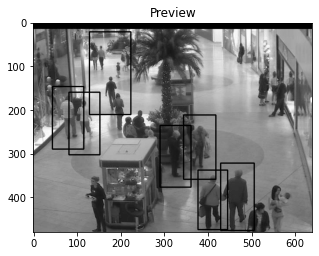

In [22]:
plotting(gray, "Preview")

Applying HOG on complete image can miss out some people here.
We can apply 2 methods here:
1. Segment the images into 4 quadrants and detect people in them
2. Use complete image to get initial count. Once we have the rectangles, we can use these reactangles to crop them and find out more people within them

Applying Operation 1

In [25]:
image.shape

(480, 640, 3)

In [28]:
print(480 // 2)
print(640 // 2)

240
320


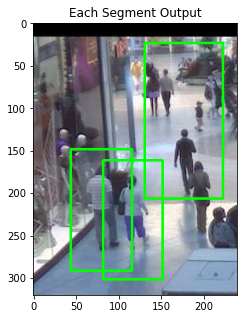

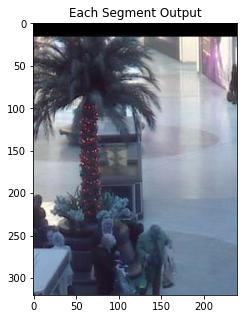

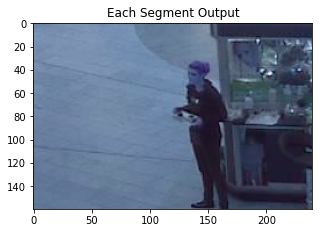

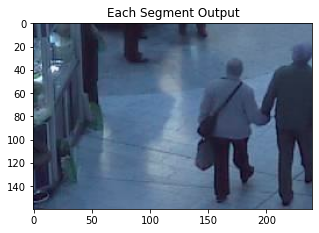

In [24]:
img_segments = get_segments(image)
for seg in img_segments:
    (rects, weights) = hog.detectMultiScale(seg, winStride=(8,8))
    rects = np.array([[x, y, x + w, y + h] for (x, y, w, h) in rects])
    for (xA, yA, xB, yB) in rects:
        cv2.rectangle(seg, (xA, yA), (xB, yB), (0, 255, 0), 2)

    plotting(seg, "Each Segment Output")